In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
#import the sample dataframe and full dataframe
sample_df = pd.read_csv("SampleDataset.csv")
full_df = pd.read_csv("CompleteDataWithGenres.csv")
final_df = pd.read_csv("10%Dataset.csv")
#creating a test dataframe
data = {'Movie':['1', '2', '3', '2', '4', '5', '1', '2', '6', '4'],
        'User': ['a', 'a', 'a', 'b', 'b', 'c', 'd', 'c', 'd', 'c']}
test = pd.DataFrame(data)

In [2]:
#a variation of an existing function to account for repeated edges
def my_add_edge(movie1, movie2, graph):
    # checks if the edge exists
    if graph.has_edge(movie1, movie2):
        # if so, increments weight
        graph[movie1][movie2]['weight'] += 1
    else:
        # otherwise adds node with weight = 1
        graph.add_edge(movie1, movie2, weight = 1)
 

In [8]:
# a simple drawing function to represent our test network
def my_draw(G):
    # as the test network is small this slow algorithm can be run no problem
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels = True)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    plt.show()

In [12]:
# this function takes a dataframe with columns of 'User's and 'Movie's and returns a network. 
# for details on the network, see the report.
def main(df):
    df = df.reset_index()
    # this for loop assumes there are no empty rows.
    for i, row in tqdm(df.iterrows(), total=len(df)):
        # this is the movie whose edges we want to add.
        mc = row['Movie']
        # this is one of the users who reviewed movie 'mc'
        uc = row['User']
        # now that we retreived all information from this row we remove it so it won't get used twice 
        #(which would result in double the edges and longer run time)
        df=df.drop(row.name)
        # here a dataframe containing all reviews made by user 'uc' is created
        dfl = df.loc[df['User'] == uc] 
        # and all movies (except movie 'mc'!) in this dataframe are saved in a list.
        lst = dfl['Movie'].tolist()
        # for all movies j in list lst the helper function 'my_add_edge(mc, j, G)' 
        # gets applied. 
        [my_add_edge(mc, j, G) for j in lst]
        # now all edges which connect movie 'mc' to every other movie which are 
        # well reviewed by user 'uc' are added to graph G
        

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]

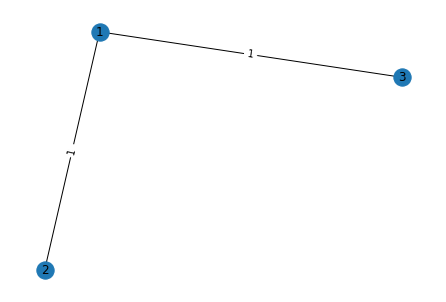

 10%|████████▎                                                                          | 1/10 [00:00<00:03,  2.68it/s]

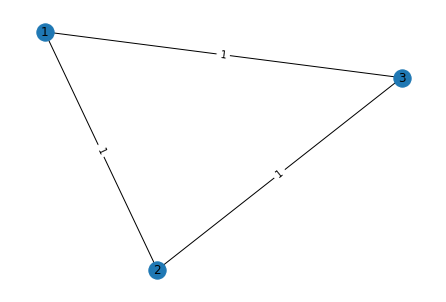

 20%|████████████████▌                                                                  | 2/10 [00:00<00:01,  4.02it/s]

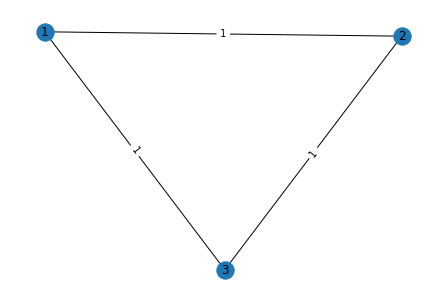

 30%|████████████████████████▉                                                          | 3/10 [00:00<00:01,  4.60it/s]

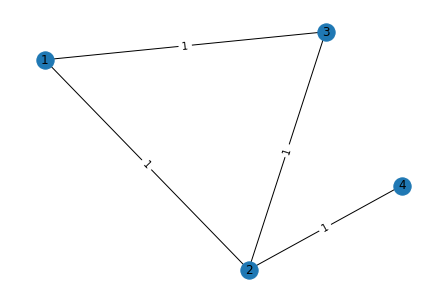

 40%|█████████████████████████████████▏                                                 | 4/10 [00:00<00:01,  4.92it/s]

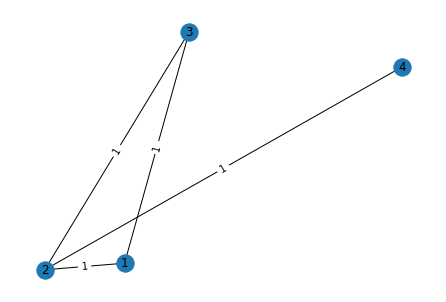

 50%|█████████████████████████████████████████▌                                         | 5/10 [00:01<00:01,  4.87it/s]

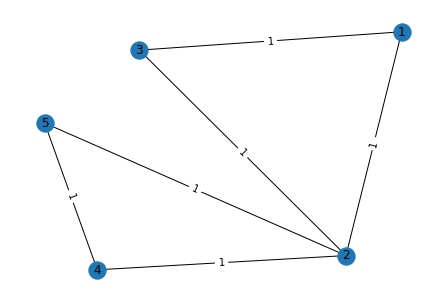

 60%|█████████████████████████████████████████████████▊                                 | 6/10 [00:01<00:01,  3.79it/s]

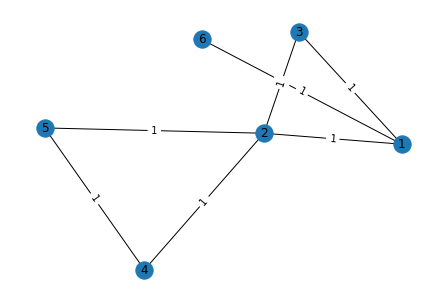

 70%|██████████████████████████████████████████████████████████                         | 7/10 [00:01<00:00,  3.88it/s]

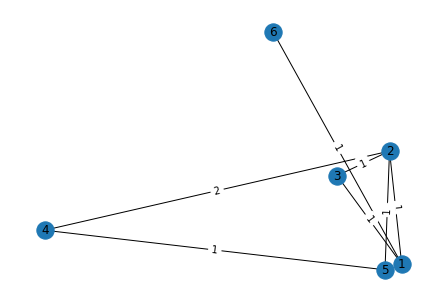

 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:01<00:00,  3.99it/s]

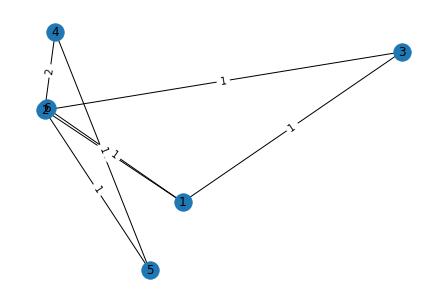

 90%|██████████████████████████████████████████████████████████████████████████▋        | 9/10 [00:02<00:00,  3.96it/s]

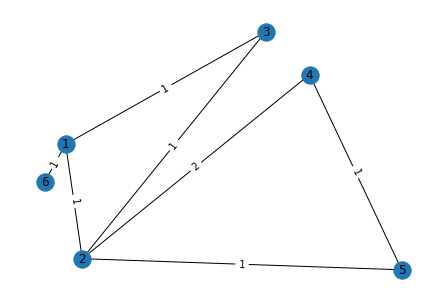

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.86it/s]


In [10]:
# %%timeit
G = nx.Graph()
main(test)
my_draw(G)

In [14]:
G = nx.Graph()
t = time.time()
main(sample_df)
nx.write_weighted_edgelist(G, 'SampleNetwork.csv')
print(time.time()-t)

100%|███████████████████████████████████████████████████████████████████████████| 48027/48027 [07:43<00:00, 103.59it/s]

463.6709723472595


In [ ]:
G = nx.Graph()
main(final_df)
nx.write_weighted_edgelist(G, '10%Network.csv')

In [ ]:
#this one tries to render the complete network
main(full_df) 